In [15]:
import sys
sys.path.insert(0, '..')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import Helpers.helpers as helper
import Helpers.cleaner as cleaner
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#y, x, ids = helper.load_csv_data('../../data/train.csv', False)
x,y = helper.load_clean_data('../../data/x_train.npy','../../data/y_train.npy')


In [24]:
print(x.shape[1])

19


In [25]:
correl = cleaner.computeCorrelation(x)
colors = [ ('b' if(yel == 1) else 'r') for yel in y]

In [26]:
for i in range(correl.shape[0]):
    for j in range(correl.shape[0]):
        if(i > j and abs(correl[i,j]) > 0.7):
            print(i,j, correl[i,j])
            plt.scatter(x[:,i],x[:,j], c=colors)
            plt.show()
            

3 2 -0.508179920384


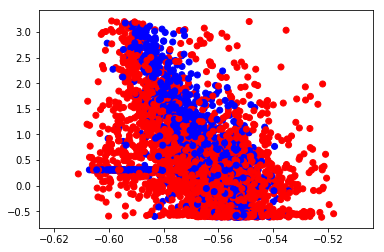

5 2 0.671211435941


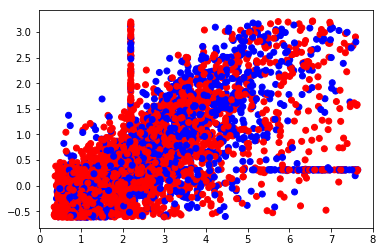

5 3 -0.43288383932


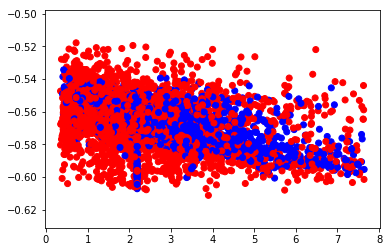

7 2 0.530227158565


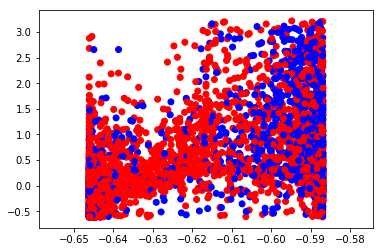

8 6 -0.544937918711


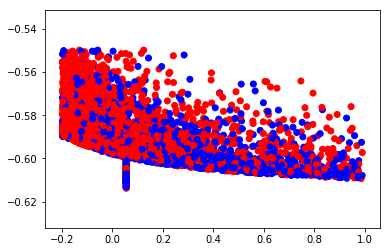

11 6 0.552321336981


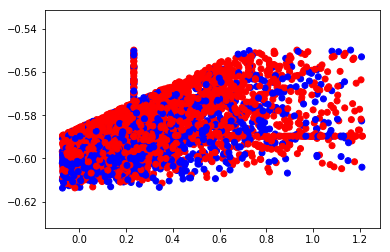

12 9 0.552904719933


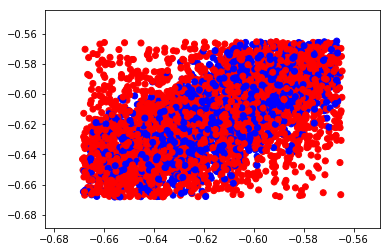

14 2 0.449829370007


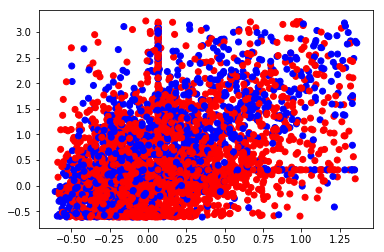

16 2 0.41840636987


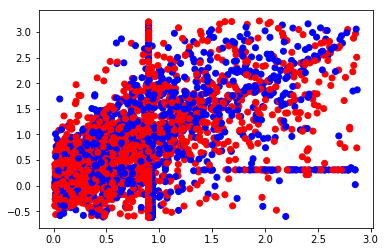

16 5 0.462955858672


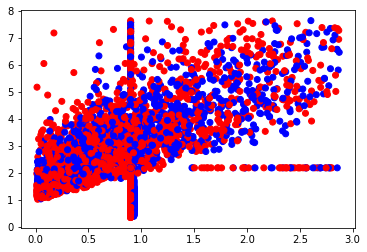

In [27]:
li = []
colors = [ ('b' if(yel == 1) else 'r') for yel in y]
for i in range(correl.shape[0]):
    for j in range(correl.shape[0]):
        
        if(i > j and abs(correl[i,j]) > 0.4 and abs(correl[i,j]) <= 0.7):
            print(i,j, correl[i,j])
            li.append((i,j,correl[i,j]))
            plt.scatter(x[:,i],x[:,j], c=colors)
            plt.show()

In [83]:
li = sorted(li, key=lambda x: abs(x[2]))[::-1]

In [84]:
def oneStep(x):
    correl = cleaner.computeCorrelation(x)
    li = []
    for i in range(correl.shape[0]):
        for j in range(i,correl.shape[1]):
            if( abs(correl[i,j]) > 0.4 and abs(correl[i,j]) <= 0.7):
                li.append((i,j,correl[i,j]))
    li = sorted(li, key=lambda x: abs(x[2]))[::-1]
    #print(li)
    if(len(li)>0):
        i = li[0][0]
        j = li[0][1]
        x_i = x[:,i]
        x_j = x[:,j]
        mul = x_i*x_j
        res = np.c_[x,mul]
        res = cleaner.remove_unused_features(x,[i,j])
        return res,False
    return x,True

In [85]:
def combineAndDelete(x):
    done = False
    xCl = x
    while(not done):
        xCl,done = oneStep(xCl) 
    return xCl

In [86]:
xClean = combineAndDelete(x)

In [88]:
print(xClean.shape[1])

12


In [89]:
helper.save_clean_data(xClean, y, '../../data/')

In [26]:
print(correl[14,16])

0.0736999140432


In [27]:
x1 = x[np.where(y == 1)]
x2 = x[np.where(y == 0)]

In [28]:
correl1 = cleaner.computeCorrelation(x1)
correl2 = cleaner.computeCorrelation(x2)

In [29]:
for i in range(correl1.shape[0]):
    for j in range(correl1.shape[0]):
        if(i > j and abs(correl1[i,j]) > 0.7):
            print(i,j, correl1[i,j])

In [30]:
li1 = []
for i in range(correl1.shape[0]):
    for j in range(correl1.shape[0]):
        if(i > j and abs(correl1[i,j]) > 0.4 and abs(correl1[i,j]) <= 0.7):
            print(i,j, correl1[i,j])
            li1.extend((i,j,correl1[i,j]))

2 0 0.689396783794
4 3 -0.60521654751
6 3 0.668033407957
6 4 -0.621519448052
8 3 0.523009593871
8 4 -0.416886918394
9 7 -0.539015342196
12 7 0.573368764593
13 10 0.673903740753
15 3 0.566811532257
15 4 -0.440114276498
15 6 0.42701439797
17 3 0.436944189481
17 4 -0.42514118474
17 6 0.505044014826


In [31]:
for i in range(correl2.shape[0]):
    for j in range(correl2.shape[0]):
        if(i > j and abs(correl2[i,j]) > 0.7):
            print(i,j, correl2[i,j])

2 0 0.728675775927


In [32]:
li2 = []
for i in range(correl2.shape[0]):
    for j in range(correl2.shape[0]):
        if(i > j and abs(correl2[i,j]) > 0.4 and abs(correl2[i,j]) <= 0.7):
            print(i,j, correl2[i,j])
            li2.extend((i,j,correl2[i,j]))

4 0 0.502235075199
4 2 0.577302448573
4 3 -0.465301190293
6 3 0.664669440989
8 1 -0.404524741756
8 3 0.520368962938
9 7 -0.51024855581
12 7 0.523057158817
13 10 0.518960570962
15 3 0.409589361672
17 6 0.419230072685
